### INTRODUCTION

In this notebook, I have studied the current cases of COVID-19 from around the world and mapped them with respective number of Confirmed Cases and number of Deaths for each country around the world. To do that, I have used a Python visualization library, namely Folium. The main point behind using Folium is that it was developed for the sole purpose of visualizing geospatial data. While other libraries are available to visualize geospatial data, such as plotly, they might have a cap on how many API calls we can make within a defined time frame. Folium, on the other hand, is completely free.

### Exploring Datasets with pandas

For this particular problem I have used the CSV file "counties-geographic-coordinates" as the dataset. This file contains total of 4 columns namely 'Country_Code' i.e. The Country Code, 'Latitude', 'Longitude' and 'Country_Name' i.e. the Country Name. Each row represents a Country. For this problem, however we will be using only three columns namely 'Name', 'Latitude' and 'Longitude'. As, for COVID-19 cases we will be scrapping the Google News website to get latest data everytime we run this notebook.

In [1]:
# Importing the NumPy and the Pandas Library.
import numpy as np
import pandas as pd

In [2]:
# The location of the file on the Device (or on the server). 
# After that we are storing the data from the csv file into the variable 'data'.
location = '/home/prashantpk/Desktop/PK/World_COVID19/countries.csv'
data = pd.read_csv(location)

In [3]:
data.head()

Country_Code   Latitude  Longitude          Country_Name
0           AD  42.546245   1.601554               Andorra
1           AE  23.424076  53.847818  United Arab Emirates
2           AF  33.939110  67.709953           Afghanistan
3           AG  17.060816 -61.796428   Antigua and Barbuda
4           AI  18.220554 -63.068615              Anguilla

In [4]:
# Now, I have reduced the columns of the data, so as to contain only necessary information that I require.
df = data[['Country_Name', 'Latitude', 'Longitude']]

In [5]:
df.head()

Country_Name   Latitude  Longitude
0               Andorra  42.546245   1.601554
1  United Arab Emirates  23.424076  53.847818
2           Afghanistan  33.939110  67.709953
3   Antigua and Barbuda  17.060816 -61.796428
4              Anguilla  18.220554 -63.068615

In [6]:
# Setting the name of the State or Union Territory as the index of the Dataframe.
df.set_index(['Country_Name'], inplace = True)

In [7]:
df.head()

Latitude  Longitude
Country_Name                              
Andorra               42.546245   1.601554
United Arab Emirates  23.424076  53.847818
Afghanistan           33.939110  67.709953
Antigua and Barbuda   17.060816 -61.796428
Anguilla              18.220554 -63.068615

### Using Folium

Folium is a powerful Python library that helps us to create several types of Leaflet maps. The fact that the Folium results are interactive makes this library is very useful for dashboard building.

In [8]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium successfully imported!')

Folium successfully imported!


Generating the world map is straigtforward in Folium. We simply create a Folium Map object with parameters 'location', 'zoom_start' or any other and then display it. What is attactive about Folium maps is that they are interactive, so we can very easily zoom into any region of interest despite the initial zoom level.

In [9]:
# Defining the world map.
world_map = folium.Map(zoom_start = 2)

In [10]:
world_map

### Scraping the data from Google News page about COVID-19 cases and transforming it to Pandas Dataframe

In [11]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

Getting the URL of the page and creating a request using requests.get() to get the data from the page.

In [12]:
url = 'https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data'
response = requests.get(url)

In [13]:
response  # Here in the output [200] means that it went through

<Response [200]>

Scraping the Google News Page content with the help of BeautifulSoup

In [14]:
soup_data = BeautifulSoup(response.text, "html.parser")

Now we will clean the Data so as to get desired data only. After that we will convert the content of the Google News page into a table.

In [15]:
web_data = []
for tr in soup_data.tbody.find_all('tr'):
    web_data.append([ td.get_text().strip() for td in tr.find_all('td')])

In [16]:
web_data

[[],
 [],
 ['1,343,937', '79,696', '201,293', '[9]'],
 ['223,578', '26,478', '133,952', '[10]'],
 ['218,268', '30,395', '103,031', '[11][12]'],
 ['215,260', '31,587', 'No data', '[14][15]'],
 ['198,676', '1,827', '31,916', '[16]'],
 ['171,324', '7,549', '138,330', '[18][17]'],
 ['156,061', '10,656', '61,685', '[19][20]'],
 ['138,854', '26,310', '56,038', '[21]'],
 ['137,115', '3,739', '89,480', '[22]'],
 ['106,220', '6,589', '86,064', '[23]'],
 ['82,901', '4,633', '78,120', '[24]'],
 ['67,702', '4,693', '31,249', '[25]'],
 ['65,015', '1,814', '20,246', '[26][27]'],
 ['62,939', '2,109', '19,358', '[28]'],
 ['52,596', '8,581', '13,411', '[30]'],
 ['42,382', '5,422', 'No data', '[32]'],
 ['37,136', '239', '10,144', '[33]'],
 ['33,460', '3,353', '17,781', '[34][35]'],
 ['30,231', '1,532', '26,400', '[36][37]'],
 ['29,465', '639', '8,023', '[38]'],
 ['29,071', '1,717', '3,433', '[39][40]'],
 ['27,406', '1,126', '2,499', '[41]'],
 ['27,219', '304', '12,667', '[48]'],
 ['25,921', '3,220', '4,

Now, we will create the dataframe of the 'web_data' table that contains our data values.

In [17]:
cases_df = pd.DataFrame(web_data, columns = ['Cases', 'Death', 'Recovered', 'Ref'])

In [18]:
cases_df.dropna(axis = 0, inplace = True)
cases_df = cases_df.iloc[0 : , : ]
cases_df

Cases   Death Recovered         Ref
2    1,343,937  79,696   201,293         [9]
3      223,578  26,478   133,952        [10]
4      218,268  30,395   103,031    [11][12]
5      215,260  31,587   No data    [14][15]
6      198,676   1,827    31,916        [16]
7      171,324   7,549   138,330    [18][17]
8      156,061  10,656    61,685    [19][20]
9      138,854  26,310    56,038        [21]
10     137,115   3,739    89,480        [22]
11     106,220   6,589    86,064        [23]
12      82,901   4,633    78,120        [24]
13      67,702   4,693    31,249        [25]
14      65,015   1,814    20,246    [26][27]
15      62,939   2,109    19,358        [28]
16      52,596   8,581    13,411        [30]
17      42,382   5,422   No data        [32]
18      37,136     239    10,144        [33]
19      33,460   3,353    17,781    [34][35]
20      30,231   1,532    26,400    [36][37]
21      29,465     639     8,023        [38]
22      29,071   1,717     3,433    [39][40]
23      27,406   1,126     2,499        [41]
24      27,219     304    12,667        [48]
25      25,921   3,220     4,971    [49][50]
26      22,760   1,446    17,110        [51]
27      22,460      20     2,296    [52][53]
28      22,052     126     6,050        [54]
29      21,331      13     2,449        [55]
30      17,417     185     4,295        [56]
31      16,454     247    11,376        [57]
..         ...     ...       ...         ...
201         16       0        14       [261]
202         16       0        10       [262]
203         16       5         7   [49][263]
204         15       1         7       [264]
205         15       2        12       [265]
206         15       0        14       [266]
207         13       0        13       [267]
208         13       4   No data  [270][271]
209         12       2   No data       [273]
210         12       1         8       [274]
211         12       0         2       [275]
212         11       1         0       [276]
213         11       0        11       [277]
214         11       1         8       [278]
215         11       0         7       [279]
216         10       0         6       [280]
217         10       1         9       [281]
218          8       0   No data       [282]
219          8       1         6       [285]
220          8       0         8       [286]
221          7       0         5       [287]
222          7       1         3       [288]
223          6       0         1       [289]
224          3       1         2       [290]
225          3       0         3       [291]
226          3       0         0       [292]
227          2       0         2       [293]
228          2       0         1       [294]
229          2       0         2       [295]
230          1       0         0       [296]

[229 rows x 4 columns]

In [19]:
cases_df.reset_index(inplace = True)
cases_df.drop(columns = ['index', 'Ref'], axis = 0, inplace = True)
cases_df.head()

Cases   Death Recovered
0  1,343,937  79,696   201,293
1    223,578  26,478   133,952
2    218,268  30,395   103,031
3    215,260  31,587   No data
4    198,676   1,827    31,916

In [20]:
cases_df.shape

(229, 3)

In [21]:
country_name = []
for th in soup_data.tbody.find_all('th'):
    country_name.append([ a.get_text().strip() for a in th.find_all('a')])

In [22]:
country_name

[['[a]'],
 ['[b]'],
 ['[c]'],
 ['[d]'],
 [],
 [],
 [],
 [],
 [],
 ['[2]'],
 [],
 ['United States', '[e]'],
 [],
 ['Spain', '[f]'],
 [],
 ['Italy'],
 [],
 ['United Kingdom', '[g]'],
 [],
 ['Russia', '[h]'],
 [],
 ['Germany', '[i]'],
 [],
 ['Brazil'],
 [],
 ['France', '[j]'],
 [],
 ['Turkey'],
 [],
 ['Iran'],
 [],
 ['China', '[k]'],
 [],
 ['Canada'],
 [],
 ['Peru'],
 [],
 ['India'],
 [],
 ['Belgium', '[l]'],
 [],
 ['Netherlands', '[m]'],
 [],
 ['Saudi Arabia'],
 [],
 ['Mexico'],
 [],
 ['Switzerland'],
 [],
 ['Pakistan'],
 [],
 ['Ecuador'],
 [],
 ['Portugal'],
 [],
 ['Chile', '[n]'],
 [],
 ['Sweden'],
 [],
 ['Ireland'],
 [],
 ['Singapore'],
 [],
 ['Belarus'],
 [],
 ['Qatar'],
 [],
 ['United Arab Emirates'],
 [],
 ['Israel', '[o]'],
 [],
 ['Japan', '[p]'],
 [],
 ['Austria'],
 [],
 ['Poland'],
 [],
 ['Romania'],
 [],
 ['Ukraine', '[q]'],
 [],
 ['Bangladesh'],
 [],
 ['Indonesia'],
 [],
 ['South Korea'],
 [],
 ['Philippines'],
 [],
 ['Colombia'],
 [],
 ['Denmark', '[r]'],
 [],
 ['Serbia', '[s

In [23]:
country_df = pd.DataFrame(country_name, columns = ['Country_Name', 'None'])
country_df

Country_Name  None
0                        [a]  None
1                        [b]  None
2                        [c]  None
3                        [d]  None
4                       None  None
5                       None  None
6                       None  None
7                       None  None
8                       None  None
9                        [2]  None
10                      None  None
11             United States   [e]
12                      None  None
13                     Spain   [f]
14                      None  None
15                     Italy  None
16                      None  None
17            United Kingdom   [g]
18                      None  None
19                    Russia   [h]
20                      None  None
21                   Germany   [i]
22                      None  None
23                    Brazil  None
24                      None  None
25                    France   [j]
26                      None  None
27                    Turkey  None
28                      None  None
29                      Iran  None
..                       ...   ...
438                     None  None
439                  Artsakh  [at]
440                     None  None
441                 Suriname  None
442                     None  None
443            HNLMS Dolfijn  [au]
444                     None  None
445               Mauritania  None
446                     None  None
447         Papua New Guinea  None
448                     None  None
449                   Bhutan  None
450                     None  None
451   British Virgin Islands  None
452                     None  None
453               Somaliland  [av]
454                     None  None
455                 Abkhazia  [aw]
456                     None  None
457                 Anguilla  None
458                     None  None
459            South Ossetia  [ax]
460                     None  None
461                  Bonaire  None
462                     None  None
463                     Saba  None
464                     None  None
465           Sint Eustatius  None
466                     None  None
467  Saint Pierre & Miquelon  None

[468 rows x 2 columns]

In [24]:
country_df.dropna(axis = 0, how = 'all', inplace = True)
country_df

Country_Name  None
0                         [a]  None
1                         [b]  None
2                         [c]  None
3                         [d]  None
9                         [2]  None
11              United States   [e]
13                      Spain   [f]
15                      Italy  None
17             United Kingdom   [g]
19                     Russia   [h]
21                    Germany   [i]
23                     Brazil  None
25                     France   [j]
27                     Turkey  None
29                       Iran  None
31                      China   [k]
33                     Canada  None
35                       Peru  None
37                      India  None
39                    Belgium   [l]
41                Netherlands   [m]
43               Saudi Arabia  None
45                     Mexico  None
47                Switzerland  None
49                   Pakistan  None
51                    Ecuador  None
53                   Portugal  None
55                      Chile   [n]
57                     Sweden  None
59                    Ireland  None
..                        ...   ...
409                  Dominica  None
411                   Namibia  None
413                 Nicaragua  None
415                   Burundi  None
417  Northern Mariana Islands  None
419       Saint Kitts & Nevis  None
421          Falkland Islands  None
423                MS Zaandam  [ar]
425            Coral Princess  [as]
427    Turks & Caicos Islands  None
429              Vatican City  None
431                   Comoros  None
433                 Greenland  None
435                Montserrat  None
437                Seychelles  None
439                   Artsakh  [at]
441                  Suriname  None
443             HNLMS Dolfijn  [au]
445                Mauritania  None
447          Papua New Guinea  None
449                    Bhutan  None
451    British Virgin Islands  None
453                Somaliland  [av]
455                  Abkhazia  [aw]
457                  Anguilla  None
459             South Ossetia  [ax]
461                   Bonaire  None
463                      Saba  None
465            Sint Eustatius  None
467   Saint Pierre & Miquelon  None

[234 rows x 2 columns]

In [25]:
country_df = country_df.iloc[5 : , :]
country_df

Country_Name  None
11              United States   [e]
13                      Spain   [f]
15                      Italy  None
17             United Kingdom   [g]
19                     Russia   [h]
21                    Germany   [i]
23                     Brazil  None
25                     France   [j]
27                     Turkey  None
29                       Iran  None
31                      China   [k]
33                     Canada  None
35                       Peru  None
37                      India  None
39                    Belgium   [l]
41                Netherlands   [m]
43               Saudi Arabia  None
45                     Mexico  None
47                Switzerland  None
49                   Pakistan  None
51                    Ecuador  None
53                   Portugal  None
55                      Chile   [n]
57                     Sweden  None
59                    Ireland  None
61                  Singapore  None
63                    Belarus  None
65                      Qatar  None
67       United Arab Emirates  None
69                     Israel   [o]
..                        ...   ...
409                  Dominica  None
411                   Namibia  None
413                 Nicaragua  None
415                   Burundi  None
417  Northern Mariana Islands  None
419       Saint Kitts & Nevis  None
421          Falkland Islands  None
423                MS Zaandam  [ar]
425            Coral Princess  [as]
427    Turks & Caicos Islands  None
429              Vatican City  None
431                   Comoros  None
433                 Greenland  None
435                Montserrat  None
437                Seychelles  None
439                   Artsakh  [at]
441                  Suriname  None
443             HNLMS Dolfijn  [au]
445                Mauritania  None
447          Papua New Guinea  None
449                    Bhutan  None
451    British Virgin Islands  None
453                Somaliland  [av]
455                  Abkhazia  [aw]
457                  Anguilla  None
459             South Ossetia  [ax]
461                   Bonaire  None
463                      Saba  None
465            Sint Eustatius  None
467   Saint Pierre & Miquelon  None

[229 rows x 2 columns]

In [26]:
country_df.reset_index(inplace = True)
country_df.drop(columns = ['index', 'None'], axis = 0, inplace = True)
country_df.head()

/home/prashantpk/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Country_Name
0   United States
1           Spain
2           Italy
3  United Kingdom
4          Russia

In [27]:
country_df.shape

(229, 1)

In [28]:
country_cases_df = country_df.merge(cases_df, left_index = True, right_index = True)

In [29]:
country_cases_df

Country_Name      Cases   Death Recovered
0               United States  1,343,937  79,696   201,293
1                       Spain    223,578  26,478   133,952
2                       Italy    218,268  30,395   103,031
3              United Kingdom    215,260  31,587   No data
4                      Russia    198,676   1,827    31,916
5                     Germany    171,324   7,549   138,330
6                      Brazil    156,061  10,656    61,685
7                      France    138,854  26,310    56,038
8                      Turkey    137,115   3,739    89,480
9                        Iran    106,220   6,589    86,064
10                      China     82,901   4,633    78,120
11                     Canada     67,702   4,693    31,249
12                       Peru     65,015   1,814    20,246
13                      India     62,939   2,109    19,358
14                    Belgium     52,596   8,581    13,411
15                Netherlands     42,382   5,422   No data
16               Saudi Arabia     37,136     239    10,144
17                     Mexico     33,460   3,353    17,781
18                Switzerland     30,231   1,532    26,400
19                   Pakistan     29,465     639     8,023
20                    Ecuador     29,071   1,717     3,433
21                   Portugal     27,406   1,126     2,499
22                      Chile     27,219     304    12,667
23                     Sweden     25,921   3,220     4,971
24                    Ireland     22,760   1,446    17,110
25                  Singapore     22,460      20     2,296
26                    Belarus     22,052     126     6,050
27                      Qatar     21,331      13     2,449
28       United Arab Emirates     17,417     185     4,295
29                     Israel     16,454     247    11,376
..                        ...        ...     ...       ...
199                  Dominica         16       0        14
200                   Namibia         16       0        10
201                 Nicaragua         16       5         7
202                   Burundi         15       1         7
203  Northern Mariana Islands         15       2        12
204       Saint Kitts & Nevis         15       0        14
205          Falkland Islands         13       0        13
206                MS Zaandam         13       4   No data
207            Coral Princess         12       2   No data
208    Turks & Caicos Islands         12       1         8
209              Vatican City         12       0         2
210                   Comoros         11       1         0
211                 Greenland         11       0        11
212                Montserrat         11       1         8
213                Seychelles         11       0         7
214                   Artsakh         10       0         6
215                  Suriname         10       1         9
216             HNLMS Dolfijn          8       0   No data
217                Mauritania          8       1         6
218          Papua New Guinea          8       0         8
219                    Bhutan          7       0         5
220    British Virgin Islands          7       1         3
221                Somaliland          6       0         1
222                  Abkhazia          3       1         2
223                  Anguilla          3       0         3
224             South Ossetia          3       0         0
225                   Bonaire          2       0         2
226                      Saba          2       0         1
227            Sint Eustatius          2       0         2
228   Saint Pierre & Miquelon          1       0         0

[229 rows x 4 columns]

In [30]:
country_cases_df.set_index(['Country_Name'], inplace = True)
country_cases_df.head()

Cases   Death Recovered
Country_Name                               
United States   1,343,937  79,696   201,293
Spain             223,578  26,478   133,952
Italy             218,268  30,395   103,031
United Kingdom    215,260  31,587   No data
Russia            198,676   1,827    31,916

After that I have merged the Countries dataFrame that contains the Country Name, Latitude and Longitude of all the states of India with the Cases DataFrame that contains the number of cases with respect to the Country names. This is the final DataFrame that I have used in the notebook.

In [31]:
final_cases_df = df.merge(country_cases_df, left_index = True, right_index = True)

In [32]:
final_cases_df.head()

Latitude  Longitude   Cases Death Recovered
Country_Name                                                      
Andorra               42.546245   1.601554     754    48       545
United Arab Emirates  23.424076  53.847818  17,417   185     4,295
Afghanistan           33.939110  67.709953   4,033   115       502
Anguilla              18.220554 -63.068615       3     0         3
Albania               41.153332  20.168331     856    31       627

In [33]:
final_cases_df.reset_index(inplace = True)

In [34]:
final_cases_df.rename(columns = {'index' : 'Country_Name'}, inplace = True)

In [35]:
final_cases_df.head()

Country_Name   Latitude  Longitude   Cases Death Recovered
0               Andorra  42.546245   1.601554     754    48       545
1  United Arab Emirates  23.424076  53.847818  17,417   185     4,295
2           Afghanistan  33.939110  67.709953   4,033   115       502
3              Anguilla  18.220554 -63.068615       3     0         3
4               Albania  41.153332  20.168331     856    31       627

In [36]:
folium_cases_df = final_cases_df[['Country_Name', 'Latitude', 'Longitude', 'Cases', 'Death', 'Recovered']]

In [37]:
final_cases_df.head()

Country_Name   Latitude  Longitude   Cases Death Recovered
0               Andorra  42.546245   1.601554     754    48       545
1  United Arab Emirates  23.424076  53.847818  17,417   185     4,295
2           Afghanistan  33.939110  67.709953   4,033   115       502
3              Anguilla  18.220554 -63.068615       3     0         3
4               Albania  41.153332  20.168331     856    31       627

In [38]:
folium_cases_df.head()

Country_Name   Latitude  Longitude   Cases Death Recovered
0               Andorra  42.546245   1.601554     754    48       545
1  United Arab Emirates  23.424076  53.847818  17,417   185     4,295
2           Afghanistan  33.939110  67.709953   4,033   115       502
3              Anguilla  18.220554 -63.068615       3     0         3
4               Albania  41.153332  20.168331     856    31       627

In [39]:
final_cases_df['Cases'] = final_cases_df['Cases'].str.replace(',', '')
final_cases_df['Death'] = final_cases_df['Death'].str.replace(',', '')
final_cases_df['Recovered'] = final_cases_df['Recovered'].str.replace(',', '')

final_cases_df['Cases'] = final_cases_df['Cases'].str.replace('—', '0')
final_cases_df['Death'] = final_cases_df['Death'].str.replace('—', '0')
final_cases_df['Recovered'] = final_cases_df['Recovered'].str.replace('—', '0')

final_cases_df['Cases'] = final_cases_df['Cases'].str.replace('No data', '0')
final_cases_df['Death'] = final_cases_df['Death'].str.replace('No data', '0')
final_cases_df['Recovered'] = final_cases_df['Recovered'].str.replace('No data', '0')

In [40]:
final_cases_df[['Cases', 'Death', 'Recovered']] = final_cases_df[['Cases', 'Death', 'Recovered']].astype(int)

In [41]:
final_cases_df

Country_Name   Latitude   Longitude    Cases  Death  Recovered
0                   Andorra  42.546245    1.601554      754     48        545
1      United Arab Emirates  23.424076   53.847818    17417    185       4295
2               Afghanistan  33.939110   67.709953     4033    115        502
3                  Anguilla  18.220554  -63.068615        3      0          3
4                   Albania  41.153332   20.168331      856     31        627
5                   Armenia  40.069099   45.038189     3175     44       1267
6                    Angola -11.202692   17.873887       43      2         13
7                 Argentina -38.416097  -63.616672     5763    300       1715
8                   Austria  47.516231   14.550072    15775    615      13928
9                 Australia -25.274398  133.775136     6846     93       6035
10                    Aruba  12.521110  -69.968338      101      3         89
11               Azerbaijan  40.143105   47.576927     2422     31       1620
12                 Barbados  13.193887  -59.543198       84      7         57
13               Bangladesh  23.684994   90.356331    13770    214       2414
14                  Belgium  50.503887    4.469936    52596   8581      13411
15             Burkina Faso  12.238333   -1.561593      748     48        569
16                 Bulgaria  42.733883   25.485830     1921     90        422
17                  Bahrain  25.930414   50.637772     4774      8       2055
18                  Burundi  -3.373056   29.918886       15      1          7
19                    Benin   9.307690    2.315834      284      2         62
20                  Bermuda  32.321384  -64.757370      118      7         64
21                   Brunei   4.535277  114.727669      141      1        132
22                  Bolivia -16.290154  -63.588653     2266    106        237
23                   Brazil -14.235004  -51.925280   156061  10656      61685
24                  Bahamas  25.034280  -77.396280       92     11         37
25                   Bhutan  27.514162   90.433601        7      0          5
26                 Botswana -22.328474   24.684866       23      1         12
27                  Belarus  53.709807   27.953389    22052    126       6050
28                   Belize  17.189877  -88.497650       18      2         16
29                   Canada  56.130366 -106.346771    67702   4693      31249
..                      ...        ...         ...      ...    ...        ...
158            Sierra Leone   8.460555  -11.779889      291     18         58
159              San Marino  43.942360   12.457777      637     41        126
160                 Senegal  14.497401  -14.452362     1634     17        643
161                 Somalia   5.152149   46.199616      997     48        110
162                Suriname   3.919305  -56.027783       10      1          9
163             El Salvador  13.794185  -88.896530      784     16        276
164                   Syria  34.802075   38.996815       47      3         29
165                    Chad  15.454166   18.732207      322     31         53
166                    Togo   8.619543    0.824782      153     10         87
167                Thailand  15.870032  100.992541     3004     56       2787
168              Tajikistan  38.861034   71.276093      612     20        592
169                 Tunisia  33.886917    9.537499     1032     45        660
170                  Turkey  38.963745   35.243322   137115   3739      89480
171                  Taiwan  23.697810  120.960515      440      6        361
172                Tanzania  -6.369028   34.888822      509     21        183
173                 Ukraine  48.379433   31.165580    14710    376       2909
174                  Uganda   1.373333   32.290275      116      0         55
175           United States  37.090240  -95.712891  1343937  79696     201293
176                 Uruguay -32.522779  -55.765835      702     18        513
177              Uzbekistan  41.37749

In [42]:
total_cases_worldwide = final_cases_df['Cases'].sum(axis = 0, skipna = True)
total_death_worldwide = final_cases_df['Death'].sum(axis = 0, skipna = True)
total_recovered_worldwide = final_cases_df['Recovered'].sum(axis = 0, skipna = True)

In [43]:
total_cases = f'{total_cases_worldwide:,}'
print('Total Number of COVID-19 Cases around the World are: ', total_cases)

Total Number of COVID-19 Cases around the World are:  4,013,293


In [44]:
total_deaths = f'{total_death_worldwide : ,}'
print('Total Number of Deaths due to COVID-19 around the World are: ', total_deaths)

Total Number of Deaths due to COVID-19 around the World are:   279,585


In [45]:
total_recovered = f'{total_recovered_worldwide : ,}'
print('Total Number of Recovered Cases due to COVID-19 around the World are: ', total_recovered)

Total Number of Recovered Cases due to COVID-19 around the World are:   1,363,021


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

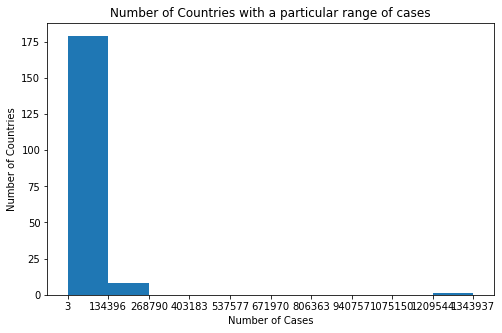

In [47]:
count, bin_edges = np.histogram(final_cases_df['Cases'])

final_cases_df['Cases'].plot(kind='hist', figsize=(8, 5), xticks = bin_edges)

plt.title('Number of Countries with a particular range of cases') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Cases') # add x-label

plt.show()

In the above plot, the x-axis represents the range of Confirmed Cases in intervals of 1151. The y-axis represents the number of states that contributed to the aforementioned cases.

From the plot we can conclude that almost 25 countries have cases between 1 to 1152, while only one state of India has greater than 10000 number of cases.

In [48]:
max_cases_df = final_cases_df.sort_values(['Cases'], ascending = False).head(10)
max_cases_df

Country_Name   Latitude   Longitude    Cases  Death  Recovered
175   United States  37.090240  -95.712891  1343937  79696     201293
51            Spain  40.463667   -3.749220   223578  26478     133952
85            Italy  41.871940   12.567380   218268  30395     103031
58   United Kingdom  55.378051   -3.435973   215260  31587          0
149          Russia  61.524010  105.318756   198676   1827      31916
41          Germany  51.165691   10.451526   171324   7549     138330
23           Brazil -14.235004  -51.925280   156061  10656      61685
56           France  46.227638    2.213749   138854  26310      56038
170          Turkey  38.963745   35.243322   137115   3739      89480
83             Iran  32.427908   53.688046   106220   6589      86064

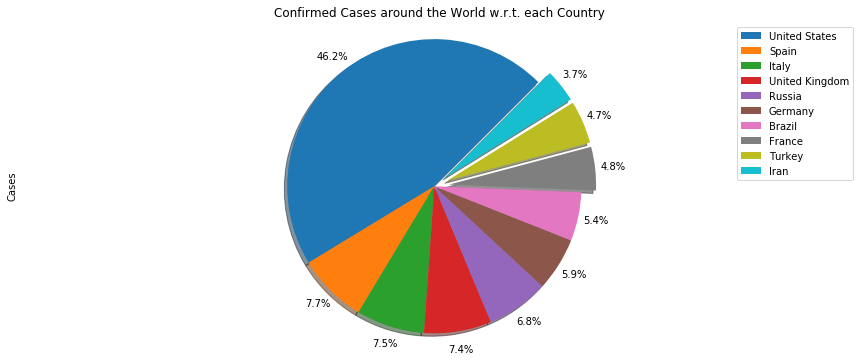

In [49]:
explode_list = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1]
max_cases_df['Cases'].plot(
                            kind = 'pie',
                            figsize = (15, 6),
                            autopct = '%1.1f%%', 
                            startangle = 45,    
                            shadow = True,       
                            labels = None,         # turn off labels on pie chart
                            pctdistance = 1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            explode = explode_list
                            )

plt.title('Confirmed Cases around the World w.r.t. each Country')
plt.axis('equal')

# add legend
plt.legend(labels = max_cases_df['Country_Name'], loc='upper right') 

plt.show()

In [50]:
max_deaths_df = final_cases_df.sort_values(['Death'], ascending = False).head(10)
max_deaths_df

Country_Name   Latitude  Longitude    Cases  Death  Recovered
175   United States  37.090240 -95.712891  1343937  79696     201293
58   United Kingdom  55.378051  -3.435973   215260  31587          0
85            Italy  41.871940  12.567380   218268  30395     103031
51            Spain  40.463667  -3.749220   223578  26478     133952
56           France  46.227638   2.213749   138854  26310      56038
23           Brazil -14.235004 -51.925280   156061  10656      61685
14          Belgium  50.503887   4.469936    52596   8581      13411
41          Germany  51.165691  10.451526   171324   7549     138330
83             Iran  32.427908  53.688046   106220   6589      86064
131     Netherlands  52.132633   5.291266    42382   5422          0

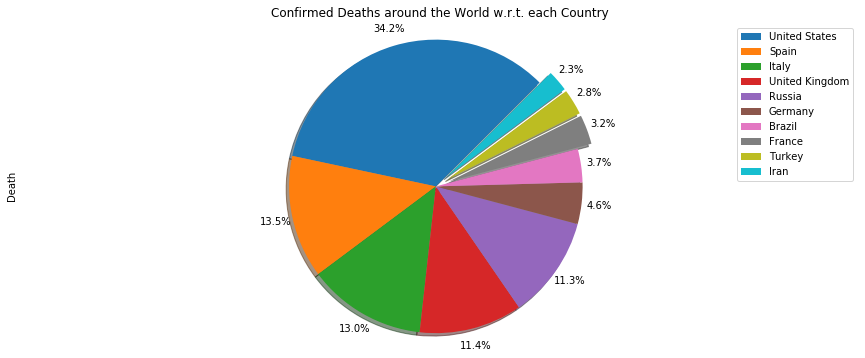

In [51]:
explode_list1 = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1]

max_deaths_df['Death'].plot(
                            kind = 'pie',
                            figsize = (15, 6),
                            autopct = '%1.1f%%', 
                            startangle = 45,    
                            shadow = True,       
                            labels = None,         # turn off labels on pie chart
                            pctdistance = 1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            explode = explode_list
                            )

plt.title('Confirmed Deaths around the World w.r.t. each Country')
plt.axis('equal')

# add legend
plt.legend(labels = max_cases_df['Country_Name'], loc='upper right') 

plt.show()

In [52]:
# Defining the world map.
world_map = folium.Map(location = [0, 0], zoom_start = 2)
world_map

In [53]:
# Instantiating a feature group for the cases in the dataframe.

cases = folium.map.FeatureGroup()


for lat, lng, in zip(folium_cases_df.Latitude, folium_cases_df.Longitude):
    cases.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius = 2, # define how big you want the circle markers to be
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )

In [54]:
# Adding Cases to the map of India
world_map.add_child(cases)

In [55]:
# Instantiating a feature group for the cases in the dataframe.
cases = folium.map.FeatureGroup()

# Looping through the cases and adding each to the cases feature group
for lat, lng, in zip(folium_cases_df.Latitude, folium_cases_df.Longitude):
    cases.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius = 2, # define how big you want the circle markers to be
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.2
        )
    )
    
# Adding a pop-up text for each marker on the map
latitudes = list(folium_cases_df.Latitude)
longitudes = list(folium_cases_df.Longitude)
labels = list(folium_cases_df.Cases)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(world_map)    
    
# Adding Cases to the map of the World
world_map.add_child(cases)

In [56]:
# Instantiating a feature group for the deaths in the dataframe.
deaths = folium.map.FeatureGroup()

# Looping through the cases and adding each to the cases feature group
for lat, lng, in zip(folium_cases_df.Latitude, folium_cases_df.Longitude):
    deaths.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Adding a pop-up text for each marker on the map
latitudes = list(folium_cases_df.Latitude)
longitudes = list(folium_cases_df.Longitude)
labels = list(folium_cases_df.Death)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(world_map)    
    
# Adding Cases to the map of the world
world_map.add_child(deaths)


# show map
world_map

In [57]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [58]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

threshold_scale = np.linspace(final_cases_df['Cases'].min(),
                              final_cases_df['Cases'].max(),
                              6, dtype = int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# let Folium determine the scale.

world_map.choropleth(
    geo_data = world_geo,
    data = final_cases_df,
    columns = ['Country_Name', 'Cases'],
    key_on = 'feature.properties.name',
    threshold_scale = threshold_scale,
    fill_color = 'YlOrRd', 
    fill_opacity = 0.7, 
    line_opacity = 0.2,
    legend_name = 'Total Number of Cases around the World'
)

world_map

In [59]:
import plotly.express as px

In [60]:
fig = px.choropleth(data_frame = final_cases_df,
                    locations = "Country_Name",
                    color = "Cases",  # value in column 'Cases' determines color
                    hover_name = "Country_Name",
                    color_continuous_scale = 'YlOrRd'  #  color scale red, yellow green
                    )

fig.show()
